In [2]:
pip install pandas numpy matplotlib seaborn ipython scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Charger le fichier CSV
df = pd.read_csv('signal_features_dataset.csv')

display(Markdown("### Dataset chargé avec succès"))
display(Markdown(f"Nombre de lignes : {len(df)}"))

### Dataset chargé avec succès

Nombre de lignes : 2452

In [5]:
# Informations sur le dataset
display(Markdown("### Informations sur le dataset :"))
# Note : df.info() affiche du texte brut, on contourne avec un résumé
df_info = pd.DataFrame({
    'Column': df.columns,
    'Type': [str(t) for t in df.dtypes],
    'Non-Null Count': df.notnull().sum()
})
display(df_info)

# Statistiques descriptives
display(Markdown("### Statistiques descriptives :"))
display(df.describe())

# Vérifier les valeurs manquantes
display(Markdown("### Valeurs manquantes par colonne :"))
display(df.isnull().sum())

### Informations sur le dataset :

,Column,Type,Non-Null Count
Mean,Mean,float64,2452
Std,Std,float64,2452
Max,Max,float64,2452
Min,Min,float64,2452
Kurtosis,Kurtosis,float64,2452
Skew,Skew,float64,2452
Dominant Frequency,Dominant Frequency,float64,2452
Dominant Amplitude,Dominant Amplitude,float64,2452
Spectral Energy,Spectral Energy,float64,2452
Envelope Mean,Envelope Mean,float64,2452


### Statistiques descriptives :

,Mean,Std,Max,Min,Kurtosis,Skew,Dominant Frequency,Dominant Amplitude,Spectral Energy,Envelope Mean,Envelope Std,Envelope Dominant Frequency,Envelope Dominant Amplitude,Label
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.0,2452.000000,2452.000000
mean,0.018401,0.207349,2.507323,-2.407303,18.074378,0.028804,6682.083197,1257.152018,1.924211e+07,0.206028,0.195930,0.0,5274.321480,0.458401
std,0.021847,0.118757,2.622644,2.607864,25.870715,0.277620,5811.591130,1020.833093,1.441972e+07,0.105304,0.151942,0.0,2695.790198,0.498368
min,-0.003799,0.027759,0.086725,-9.065726,-0.823566,-1.098744,0.000000,219.201803,2.617814e+05,0.034039,0.019915,0.0,871.410187,0.000000
25%,-0.003661,0.029061,0.110891,-3.664244,-0.792097,-0.125999,453.000000,229.763897,2.857628e+05,0.035615,0.020917,0.0,911.750013,0.000000
50%,0.013845,0.223252,0.573921,-0.505043,0.300927,-0.006182,11972.000000,963.644565,1.738412e+07,0.256696,0.117836,0.0,6571.417372,0.000000
75%,0.040658,0.271391,3.976952,-0.130193,19.638894,0.074189,12032.000000,2795.200878,2.521124e+07,0.284692,0.285304,0.0,7288.111012,1.000000
max,0.049828,0.392832,8.531739,-0.106221,84.596324,1.726174,12032.000000,2947.314450,5.057319e+07,0.299340,0.482382,0.0,7663.098812,1.000000


### Valeurs manquantes par colonne :

Mean                           0
Std                            0
Max                            0
Min                            0
Kurtosis                       0
Skew                           0
Dominant Frequency             0
Dominant Amplitude             0
Spectral Energy                0
Envelope Mean                  0
Envelope Std                   0
Envelope Dominant Frequency    0
Envelope Dominant Amplitude    0
Label                          0
Signal Name                    0
dtype: int64

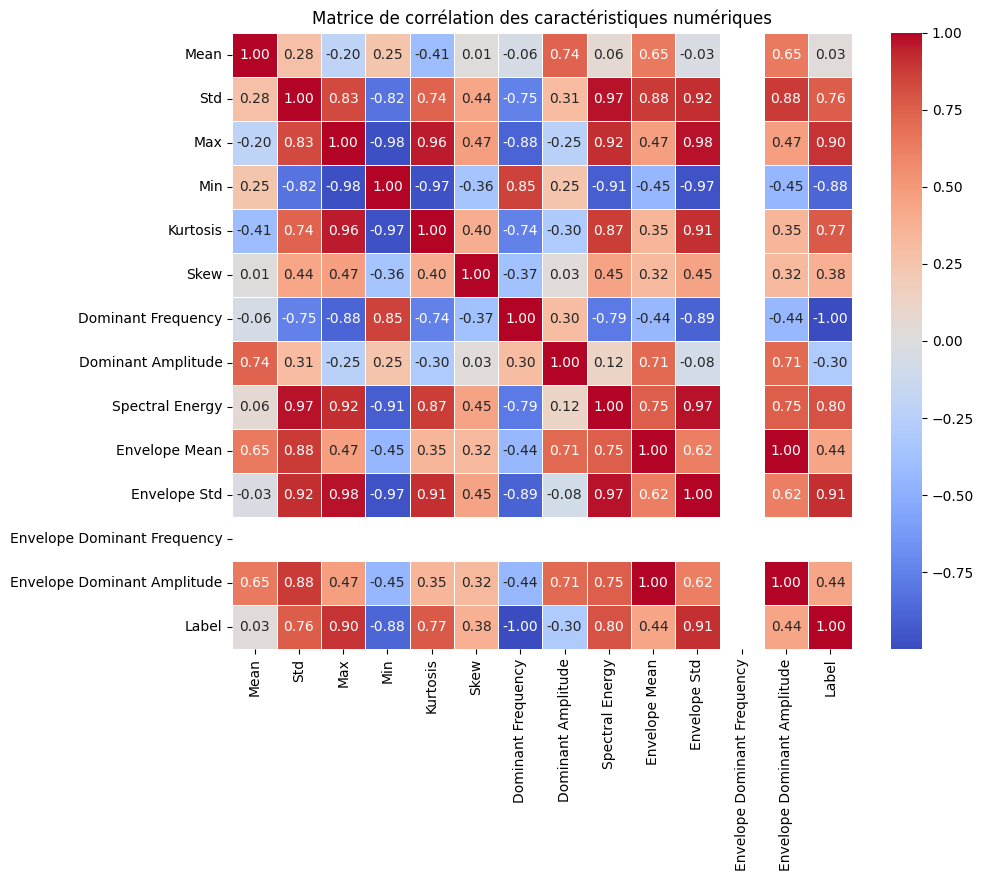

In [6]:
# Sélectionner les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]
corr_matrix = df_numeric.corr()

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation des caractéristiques numériques')
plt.show()

In [7]:
threshold_high = 0.7
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold_high:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

display(Markdown("### Variables très corrélées entre elles (|corr| > 0.7) :"))
if high_corr_pairs:
    display(pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Corrélation']))
else:
    display(Markdown("- Aucune détectée"))

### Variables très corrélées entre elles (|corr| > 0.7) :

,Variable 1,Variable 2,Corrélation
0,Mean,Dominant Amplitude,0.740196
1,Std,Max,0.831877
2,Std,Min,-0.817131
3,Std,Kurtosis,0.740425
4,Std,Dominant Frequency,-0.747951
5,Std,Spectral Energy,0.972963
6,Std,Envelope Mean,0.877358
7,Std,Envelope Std,0.920952
8,Std,Envelope Dominant Amplitude,0.877358
9,Std,Label,0.760535


In [ ]:
threshold_low = 0.3
label_corr = corr_matrix['Label'].drop('Label')
low_corr_vars = label_corr[abs(label_corr) < threshold_low]

display(Markdown("### Variables peu corrélées avec Label (|corr| < 0.3) :"))
if not low_corr_vars.empty:
    display(pd.DataFrame(low_corr_vars, columns=['Corrélation']))
else:
    display(Markdown("- Aucune détectée"))

### Variables peu corrélées avec Label (|corr| < 0.3) :

,Corrélation


In [1]:
# Exclure 'Signal Name' (catégorique) et garder uniquement les numériques sauf 'Label'
features = [col for col in numeric_cols if col != 'Label']
X = df_clean[features]
y = df_clean['Label']

display(Markdown("### Features sélectionnées :"))
display(pd.Series(features))
display(Markdown(f"### Nombre de classes dans Label : {y.nunique()}"))

NameError: name 'numeric_cols' is not defined